# Setup


## Importando bibliotecas

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Carregando os dados

In [18]:
path = '../data/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('../data')
zip_object.close()

## Checando a qualidade dos dados

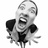

In [19]:
tf.keras.preprocessing.image.load_img('../data/fer2013/train/Angry/1003.jpg')

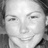

In [20]:
tf.keras.preprocessing.image.load_img('../data/fer2013/train/Happy/1.jpg')

# Base de Treino e Teste

## Treinamento

In [21]:
'''
abaixo faremos a seleção dos dados de pre-processamento das imagens da base de treinamento
'''

gerador_treinamento = ImageDataGenerator(rescale=1./255, # Normalização das imagens
                                         rotation_range=7, # Rotação
                                         horizontal_flip=True, # Flip horizontal
                                         zoom_range=0.2) # Zoom

'''
abaixo é feita a criação do Dataset de treinamento,
para isso eu uso uma função chamada flow_from_directory que agrupa cada imagem e cria um banco de dados com as mesmas,
'''

dataset_treinamento = gerador_treinamento.flow_from_directory('../data/fer2013/train',
                                                              target_size = (48, 48), # Tamanho das imagens
                                                              batch_size = 16, # Tamanho do grupo de imagens lidas e enviadas por vez
                                                              class_mode = 'categorical', # data type
                                                              shuffle = True) # Evita que o modelo memorize e aprenda com a ordem das imagens                                                           
print(np.unique(dataset_treinamento.classes, return_counts=True))
print()
print(dataset_treinamento.class_indices)

Found 28709 images belonging to 7 classes.
(array([0, 1, 2, 3, 4, 5, 6]), array([3995,  436, 4097, 7215, 4965, 4830, 3171], dtype=int64))

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


## Informações dados de Treinamento:

Contagem dos dados:

| Índice | Classe   | Quantidade |
|--------|----------|------------|
| 0      | Angry    | 3995       |
| 1      | Disgust  | 436        |
| 2      | Fear     | 4097       |
| 3      | Happy    | 7215       |
| 4      | Neutral  | 4965       |
| 5      | Sad      | 4830       |
| 6      | Surprise | 3171       |


## Teste

In [22]:
gerador_teste = ImageDataGenerator(rescale=1./255)


dataset_teste = gerador_teste.flow_from_directory('../data/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)
                                   
print(np.unique(dataset_teste.classes, return_counts=True))
print()
print(dataset_teste.class_indices)

Found 3589 images belonging to 7 classes.
(array([0, 1, 2, 3, 4, 5, 6]), array([491,  55, 528, 879, 626, 594, 416], dtype=int64))

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


## Informações dos dados de Teste:

Contagem dos dados:

| Índice | Classe   | Quantidade |
|--------|----------|------------|
| 0      | Angry    | 491        |
| 1      | Disgust  | 55         |
| 2      | Fear     | 528        |
| 3      | Happy    | 879        |
| 4      | Neutral  | 626        |
| 5      | Sad      | 594        |
| 6      | Surprise | 416        |


# Construindo uma Rede Neural Convolucional com Python

## Primeiro, definimos algumas variáveis importantes:

In [23]:
numero_detectores = 32
numero_classes = 7
largura, altura = 48, 48
epocas = 70

## Inicializamos a rede neural sequencial:

In [24]:
network = Sequential()

In [25]:
network.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), activation='relu', padding='same', input_shape=(largura, altura, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units=2 * numero_detectores, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=2 * numero_detectores, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=numero_classes, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

## Imprimindo um resumo da rede:

In [26]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

## Compilando e Treinando a Rede Neural

In [27]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#network.fit(dataset_treinamento, epochs=epocas)

Epoch 1/70
1795/1795 [==============================] - 38s 20ms/step - loss: 2.0256 - accuracy: 0.2246

Epoch 2/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 1.5614 - accuracy: 0.3895

Epoch 3/70 
1795/1795 [==============================] - 37s 20ms/step - loss: 1.4009 - accuracy: 0.4619

Epoch 4/70
1795/1795 [==============================] - 36s 20ms/step - loss: 1.3134 - accuracy: 0.5061

Epoch 5/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.2743 - accuracy: 0.5183

Epoch 6/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.2236 - accuracy: 0.5400

Epoch 7/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.1825 - accuracy: 0.5598

Epoch 8/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.1613 - accuracy: 0.5653

Epoch 9/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.1426 - accuracy: 0.5772

Epoch 10/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.1185 - accuracy: 0.5844

Epoch 11/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0845 - accuracy: 0.5962

Epoch 12/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0678 - accuracy: 0.6065

Epoch 13/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0518 - accuracy: 0.6136

Epoch 14/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0405 - accuracy: 0.6152 

Epoch 15/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0391 - accuracy: 0.6178 

Epoch 16/70 
1795/1795 [==============================] - 35s 20ms/step - loss: 1.0083 - accuracy: 0.6310 

Epoch 17/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 1.0001 - accuracy: 0.6324 

Epoch 18/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.9924 - accuracy: 0.6372 

Epoch 19/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9713 - accuracy: 0.6461 

Epoch 20/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9600 - accuracy: 0.6492 

Epoch 21/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9497 - accuracy: 0.6501 

Epoch 22/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9480 - accuracy: 0.6524 

Epoch 23/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.9347 - accuracy: 0.6624 

Epoch 24/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.9208 - accuracy: 0.6614 

Epoch 25/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9181 - accuracy: 0.6632 

Epoch 26/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9183 - accuracy: 0.6625 

Epoch 27/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.9082 - accuracy: 0.6725 

Epoch 28/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 0.9078 - accuracy: 0.6683 

Epoch 29/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 0.8960 - accuracy: 0.6748 

Epoch 30/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 0.8962 - accuracy: 0.6717 

Epoch 31/70 
1795/1795 [==============================] - 36s 20ms/step - loss: 0.8926 - accuracy: 0.6716 

Epoch 32/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.8802 - accuracy: 0.6754 

Epoch 33/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.8654 - accuracy: 0.6854 

Epoch 34/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.8696 - accuracy: 0.6851 

Epoch 35/70
1795/1795 [==============================] - 37s 21ms/step - loss: 0.8498 - accuracy: 0.6913 

Epoch 36/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.8514 - accuracy: 0.6937 

Epoch 37/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8279 - accuracy: 0.6985 

Epoch 38/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8395 - accuracy: 0.6933 

Epoch 39/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8263 - accuracy: 0.7002 

Epoch 40/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8215 - accuracy: 0.7015 

Epoch 41/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8237 - accuracy: 0.6977 

Epoch 42/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8037 - accuracy: 0.7068 

Epoch 43/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8071 - accuracy: 0.7090 

Epoch 44/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8033 - accuracy: 0.7076 

Epoch 45/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.8166 - accuracy: 0.7033 

Epoch 46/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7820 - accuracy: 0.7159 

Epoch 47/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7790 - accuracy: 0.7176 

Epoch 48/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7892 - accuracy: 0.7157 

Epoch 49/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7482 - accuracy: 0.7267 

Epoch 50/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7596 - accuracy: 0.7236 

Epoch 51/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7584 - accuracy: 0.7245 

Epoch 52/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7694 - accuracy: 0.7243 

Epoch 53/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7471 - accuracy: 0.7341 

Epoch 54/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7522 - accuracy: 0.7275 

Epoch 55/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7383 - accuracy: 0.7290 

Epoch 56/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7521 - accuracy: 0.7292 

Epoch 57/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7397 - accuracy: 0.7287 

Epoch 58/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7218 - accuracy: 0.7419 

Epoch 59/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7223 - accuracy: 0.7429 

Epoch 60/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7106 - accuracy: 0.7436 

Epoch 61/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7170 - accuracy: 0.7418 

Epoch 62/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.7200 - accuracy: 0.7405 

Epoch 63/70 
1795/1795 [==============================] - 37s 21ms/step - loss: 0.7152 - accuracy: 0.7424 

Epoch 64/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6988 - accuracy: 0.7485 

Epoch 65/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6973 - accuracy: 0.7513 

Epoch 66/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6906 - accuracy: 0.7524 

Epoch 67/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6973 - accuracy: 0.7516 

Epoch 68/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6821 - accuracy: 0.7492 

Epoch 69/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6768 - accuracy: 0.7601 

Epoch 70/70 
1795/1795 [==============================] - 38s 21ms/step - loss: 0.6884 - accuracy: 0.7520

# Salvando a Rede Neural

In [29]:
#model_json = network.to_json()
#with open('../models/network_emotions.json','w') as json_file:
#  json_file.write(model_json)

In [30]:
#from keras.models import save_model
#network_saved = save_model(network, '../models/weights_emotions.hdf5')

In [31]:
with open('../models/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias

In [32]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('../models/weights_emotions.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

# Avaliando Rede Neural

In [34]:
network_loaded.evaluate(dataset_teste)

3589/3589 [==============================] - 37s 10ms/step - loss: 1.5130 - accuracy: 0.5882


[1.5129728317260742, 0.5881861448287964]

In [35]:
previsoes = network_loaded.predict(dataset_teste)
previsoes

3589/3589 [==============================] - 27s 7ms/step


array([[9.0987521e-01, 2.7691678e-03, 1.1733084e-02, ..., 3.6963332e-02,
        3.6179960e-02, 1.2400384e-04],
       [9.7891700e-01, 1.5266249e-05, 2.0007506e-02, ..., 1.8932817e-04,
        3.8356276e-04, 4.7940342e-04],
       [9.9388194e-01, 4.6806276e-04, 1.8056487e-03, ..., 1.4164139e-04,
        2.8755523e-03, 7.6790965e-09],
       ...,
       [2.2505305e-03, 2.1739601e-05, 1.5114370e-01, ..., 2.7369708e-04,
        2.5701486e-03, 8.4373456e-01],
       [8.5635565e-04, 1.0121016e-06, 2.2768987e-02, ..., 5.4444107e-03,
        1.6585175e-03, 9.6819341e-01],
       [2.4937910e-03, 8.6727268e-06, 4.1950334e-02, ..., 5.3764884e-03,
        5.4008393e-03, 9.3733025e-01]], dtype=float32)

In [36]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [37]:
dataset_teste.classes

array([0, 0, 0, ..., 6, 6, 6])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.5881861242685985

In [39]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[313,   4,  33,  14,  61,  59,   7],
       [ 11,  36,   0,   1,   2,   2,   3],
       [ 79,   4, 203,  10,  69,  96,  67],
       [ 19,   0,   4, 775,  40,  17,  24],
       [104,  11,  71, 157, 119,  96,  68],
       [ 62,   2,  38,  25, 128, 327,  12],
       [ 14,   0,  30,  19,  10,   5, 338]], dtype=int64)

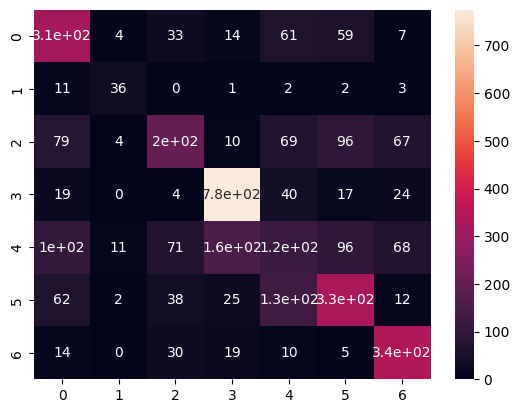

In [41]:
sns.heatmap(cm, annot=True);

In [42]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       491
           1       0.63      0.65      0.64        55
           2       0.54      0.38      0.45       528
           3       0.77      0.88      0.82       879
           4       0.28      0.19      0.23       626
           5       0.54      0.55      0.55       594
           6       0.65      0.81      0.72       416

    accuracy                           0.59      3589
   macro avg       0.56      0.59      0.57      3589
weighted avg       0.56      0.59      0.57      3589



# Classificando uma imagem

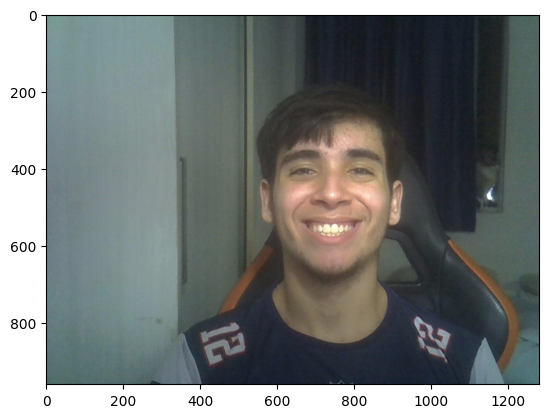

In [43]:
# Carregar a imagem
imagem = mpimg.imread('../data/img/foto feliz.jpg')

# Exibir a imagem
plt.imshow(imagem)
plt.show()

In [44]:
imagem.shape

(960, 1280, 3)

In [45]:
detector_face = cv2.CascadeClassifier('../data/cascade/haarcascade_frontalface_default.xml')

In [46]:
imagem_original = imagem.copy()
deteccoes = detector_face.detectMultiScale(imagem_original)

In [50]:
deteccoes

array([[552, 256, 384, 384]])

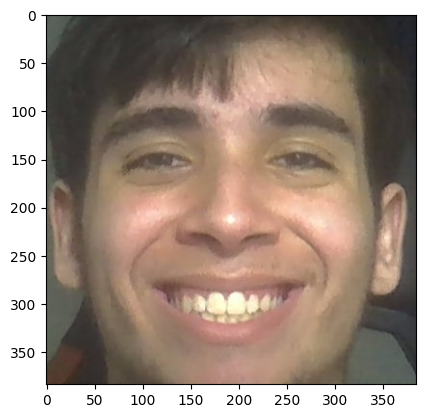

In [61]:
roi = imagem[256:256 + 384, 552:552 + 384]
# Exibir a imagem
plt.imshow(roi)
plt.show()

In [62]:
roi.shape

(384, 384, 3)

In [63]:
roi = cv2.resize(roi, (48,48))

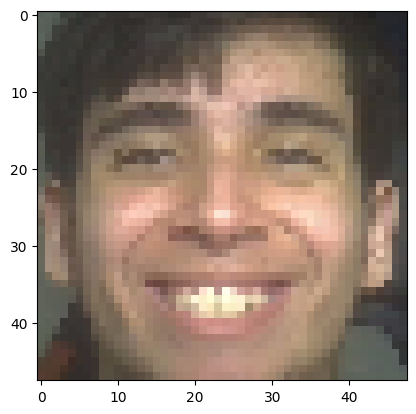

In [64]:
plt.imshow(roi)
plt.show()

In [66]:
roi.shape

(48, 48, 3)

In [65]:
roi

array([[[ 87,  94,  87],
        [ 87,  97,  89],
        [ 82,  92,  84],
        ...,
        [ 38,  39,  43],
        [ 37,  38,  42],
        [ 36,  37,  41]],

       [[ 90,  97,  90],
        [ 88,  95,  88],
        [ 78,  85,  78],
        ...,
        [ 38,  39,  44],
        [ 38,  39,  44],
        [ 35,  36,  41]],

       [[ 87,  97,  89],
        [ 84,  94,  86],
        [ 61,  65,  62],
        ...,
        [ 36,  37,  41],
        [ 34,  37,  44],
        [ 35,  38,  44]],

       ...,

       [[ 75,  66,  53],
        [ 79,  60,  48],
        [ 83,  60,  48],
        ...,
        [ 88,  98,  91],
        [ 88,  97,  93],
        [ 49,  53,  54]],

       [[ 79,  61,  49],
        [ 82,  60,  47],
        [ 81,  59,  46],
        ...,
        [ 90,  99,  94],
        [ 88,  97,  92],
        [ 86,  92,  92]],

       [[ 85,  61,  51],
        [ 82,  58,  46],
        [ 76,  57,  43],
        ...,
        [ 90, 100,  92],
        [ 90,  99,  92],
        [ 88,  98,  91]]

In [67]:
roi = roi / 255
roi

array([[[0.34117647, 0.36862745, 0.34117647],
        [0.34117647, 0.38039216, 0.34901961],
        [0.32156863, 0.36078431, 0.32941176],
        ...,
        [0.14901961, 0.15294118, 0.16862745],
        [0.14509804, 0.14901961, 0.16470588],
        [0.14117647, 0.14509804, 0.16078431]],

       [[0.35294118, 0.38039216, 0.35294118],
        [0.34509804, 0.37254902, 0.34509804],
        [0.30588235, 0.33333333, 0.30588235],
        ...,
        [0.14901961, 0.15294118, 0.17254902],
        [0.14901961, 0.15294118, 0.17254902],
        [0.1372549 , 0.14117647, 0.16078431]],

       [[0.34117647, 0.38039216, 0.34901961],
        [0.32941176, 0.36862745, 0.3372549 ],
        [0.23921569, 0.25490196, 0.24313725],
        ...,
        [0.14117647, 0.14509804, 0.16078431],
        [0.13333333, 0.14509804, 0.17254902],
        [0.1372549 , 0.14901961, 0.17254902]],

       ...,

       [[0.29411765, 0.25882353, 0.20784314],
        [0.30980392, 0.23529412, 0.18823529],
        [0.3254902 , 0

In [68]:
roi.shape

(48, 48, 3)

In [69]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [70]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 344ms/step


array([[5.1873137e-04, 6.8656698e-07, 1.1569181e-03, 9.7541136e-01,
        2.0885037e-02, 1.9912086e-03, 3.6040106e-05]], dtype=float32)

In [71]:
previsao = np.argmax(probs)
previsao

3

In [72]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Classificando muitas imagens

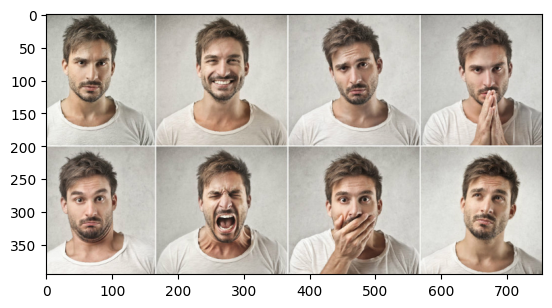

In [75]:
imagem = cv2.imread('../data/img/faces_emotions.png')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show()

In [76]:
deteccoes = detector_face.detectMultiScale(imagem)
deteccoes

array([[224,  35,  90,  90],
       [229, 242,  85,  85],
       [625,  49,  91,  91],
       [ 23,  41,  92,  92],
       [ 18, 243,  98,  98],
       [627, 241,  91,  91],
       [420,  43,  97,  97],
       [420, 242,  97,  97]])

In [77]:
dataset_teste.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [78]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 33ms/step


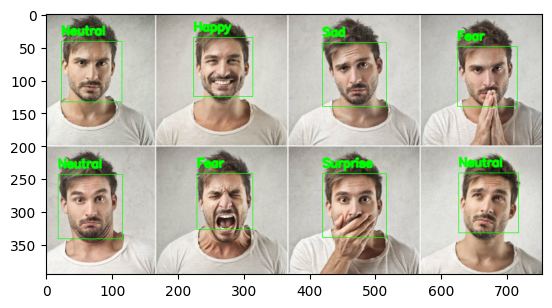

In [80]:
for (x, y, w, h) in deteccoes:

  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 1)
  roi = imagem[y:y + h, x:x + w]

  roi = cv2.resize(roi, (48,48))

  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)

  previsao = network_loaded.predict(roi)

  cv2.putText(imagem, emotions[np.argmax(previsao)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)
plt.show()

# Classificando Vídeo

In [81]:
cap = cv2.VideoCapture('../data/vid/emotion_test01.mp4')
conectado, video = cap.read()
print(conectado, video.shape)

True (360, 640, 3)


In [83]:
save_path = '../data/vid/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [84]:
while (cv2.waitKey(1) < 0):
  conectado, frame = cap.read()
  if not conectado:
    break
  deteccoes = detector_face.detectMultiScale(frame, scaleFactor=1.2,minNeighbors=5, minSize=(30,30))
  if len(deteccoes) > 0:
    for (x, y, w, h) in deteccoes:
      frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0,255,0), 2)
      roi = frame[y:y + h, x:x + w]
      roi = cv2.resize(roi, (48,48))
      roi = roi / 255
      roi = np.expand_dims(roi, axis = 0)
      previsao = network_loaded.predict(roi)

      if previsao is not None:
        resultado = np.argmax(previsao)
        cv2.putText(frame, emotions[resultado], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
  
  output_video.write(frame)

print('Terminou!')
output_video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step
Terminou!
